<font size="4">

# WISCONSINE BREAST CANCER

El dataset Wisconsin Breast Cancer (Diagnostic) es un conjunto de datos muy utilizado en problemas de clasificación médica. Contiene información sobre características de núcleos celulares extraídas de imágenes digitalizadas de muestras de tejido mamario. El objetivo es predecir si un tumor es maligno o benigno a partir de 30 características numéricas como la textura, compacidad, simetría o radio medio de las células. Cada muestra ha sido etiquetada por médicos como "M" (maligno) o "B" (benigno).

In [69]:
# importamos librerias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import warnings

from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings('ignore')

In [70]:
# lectura del dataset
dataset = pd.read_csv("dataset_wisconsine.csv", sep=",")
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<font size="4">

Tal y como podemos observar, cada una de las características del dataset se han calculado 3 valores:

- mean: media de cada atributo por imagen
- se: error estándar (desviación típica)
- worst: valor más alto observado

Atributos base:

- radius: radio medio (distancia desde el centro al borde del núcleo)
- texture: desviación estándar de los valores de gris (relacionado con rugosidad de la imagen)
- perimeter: perímetro del núcleo
- area: área del núcleo
- smoothness: uniformidad de los contornos (valores bajos indican bordes irregulares)
- compactness: relación entre el perímetro y el área (perímetro² / área - 1.0)
- concavity: medida de la concavidad del contorno del núcleo (qué tan cóncavo es)
- concave points: número de puntos cóncavos en el contorno
- symmetry: simetría del núcleo
- fractal dimension: complejidad del contorno (valores mayores indican contornos más irregulares)

Como podemos observar a continuación, el dataset consta de 569 registros y de 11 columnas, de las cuales 10*3 equivales a las entradas, 1 (diagnosis) que equivale a la solución y, 2 columnas que corresponden al id y una columna que se crea con valores nulos debido a un error del dataset. Estas dos últimas, las eliminaremos ya que no se relacionan con el dataset.

In [71]:
# dimensiones del dataset
dataset.shape

(569, 33)

In [72]:
# eliminamos columna "unname" y "id"
dataset.drop(columns=["id", "Unnamed: 32"], inplace=True)
dataset.shape

(569, 31)

<font size="4">

# Análisis Exploratorio de Datos

Primeramente, vamos a entender de que va el dataset, como se distribuyen los datos, como están repartidos los valores de cada variables... para ello, realizaremos un análisis exploratorio de los datos (EDA), con el que entenderemos las variables y los valores que pueden adquirir estas.

Primeramente, vemos con la funcion info() cada una de las variables y el tipo que son. Como se puede apreciar, todas las variables que vamos a usar son de tipo float, excepto la variable objetivo, que es la variable resultado, que es de tipo string. 

Más adelante, como se puede observar, obtenemos la cantidad de valores nulos por cada una de las columnas del dataset y obtenemos un breve resumen de cada columna en forma de estadísticos (media, desviacion, maximo, minimos...)

In [73]:
# tipos de variables
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [74]:
# valores nulos
dataset.isnull().sum().sort_values(ascending=False)

diagnosis                  0
compactness_se             0
symmetry_worst             0
concave points_worst       0
concavity_worst            0
compactness_worst          0
smoothness_worst           0
area_worst                 0
perimeter_worst            0
texture_worst              0
radius_worst               0
fractal_dimension_se       0
symmetry_se                0
concave points_se          0
concavity_se               0
smoothness_se              0
radius_mean                0
area_se                    0
perimeter_se               0
texture_se                 0
radius_se                  0
fractal_dimension_mean     0
symmetry_mean              0
concave points_mean        0
concavity_mean             0
compactness_mean           0
smoothness_mean            0
area_mean                  0
perimeter_mean             0
texture_mean               0
fractal_dimension_worst    0
dtype: int64

In [75]:
# resumen de las columnas
dataset.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<font size="4">

Una vez hemos obtenido una pequeña información sobre el dataset a modo general, procedemos a analizar las columnas del dataset. Primero, vamos a analizar la columna de la variable resultado (diagnosis). Tal y como se aprecia en el gráfico, los valores de las variables están equilibradas, es decir, la muestra no está desequilibrado, lo que nos hubiera podido conducir a problemas en la predicción de la clase minoritaria. Tras realizar esto, procedemos a mappear la solución, en donde, asignaremos valores 0 y 1 a las clases de la variable objetivo.

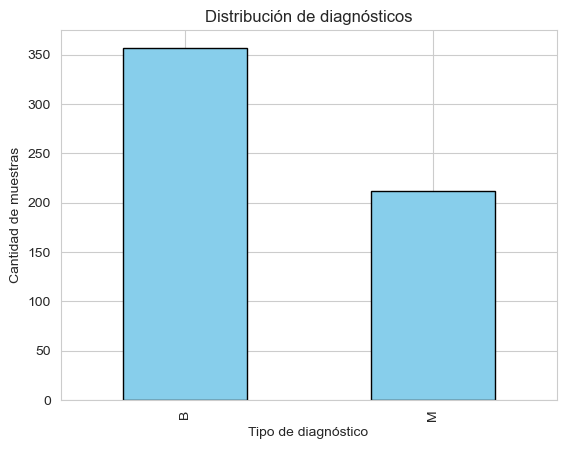

diagnosis
B    357
M    212
Name: count, dtype: int64


In [76]:
# Contamos los valores únicos de la columna 'diagnosis'
conteo = dataset["diagnosis"].value_counts()

# Creamos el gráfico de barras
conteo.plot(kind='bar', color='skyblue', edgecolor='black')

# Añadimos títulos y etiquetas
plt.title("Distribución de diagnósticos")
plt.xlabel("Tipo de diagnóstico")
plt.ylabel("Cantidad de muestras")

# Mostramos el gráfico
plt.show()

# Mostramos cantidades
print(f"{dataset["diagnosis"].value_counts()}")

In [77]:
diagnosis_map = {
    "B" : 1,
    "M" : 0
}

dataset["diagnosis"] = dataset["diagnosis"].map(diagnosis_map)

<font size="4">

#### Variables Cuantitativas

Una vez hemos analizado la variable objetivo, la columna resultados, vamos a analizar las columnas cuantitativas, es decir, todas las variables numéricas. Para ello, vamos a ver, como se distribuyen sus valores por la gráfica. Como se puede apreciar a continuación, la gran mayoría de los datos de cada una de las variables sigue una distribución normal. Esto se comprueba ya que, hay algoritmos que funcionan muy bien y otros que funciónan muy mal con una distribución específica de los datos.

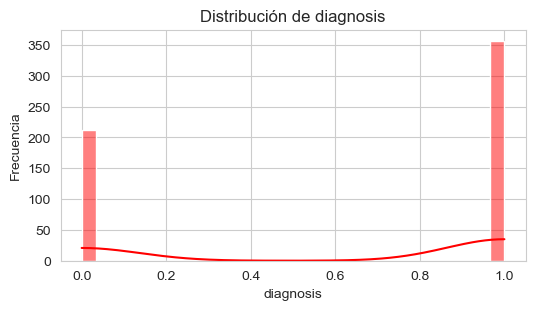

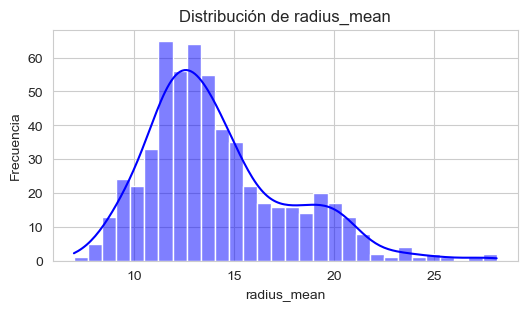

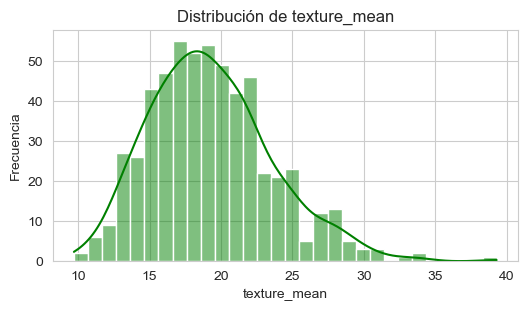

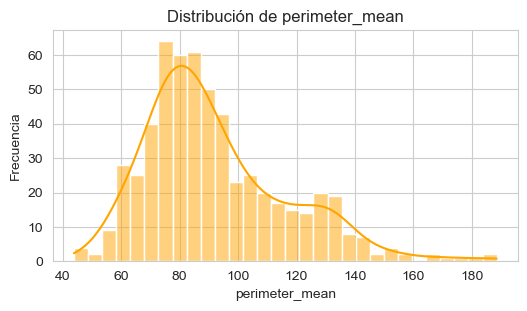

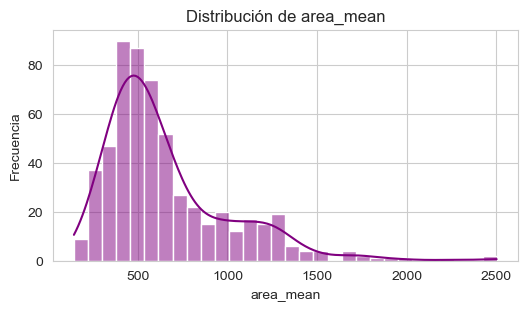

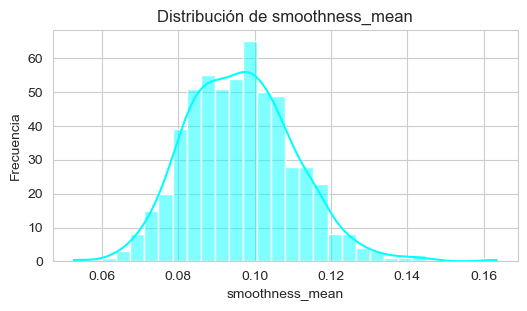

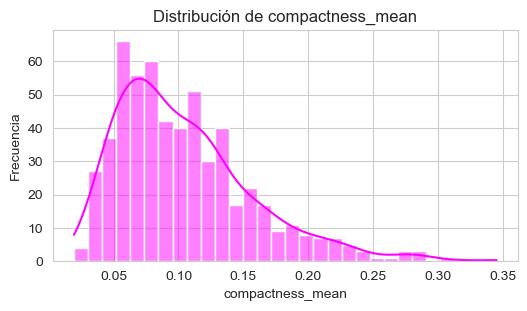

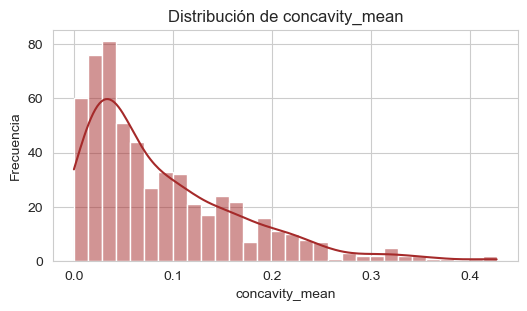

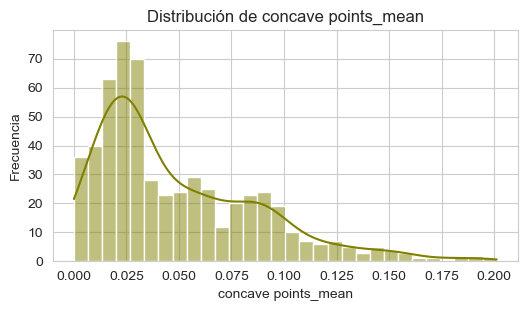

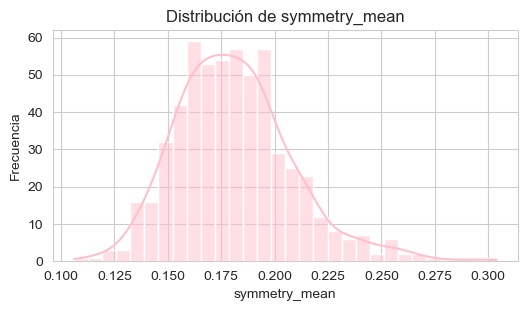

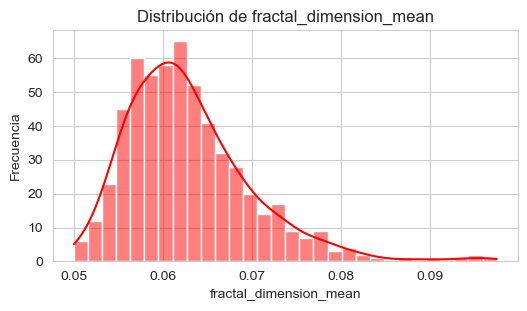

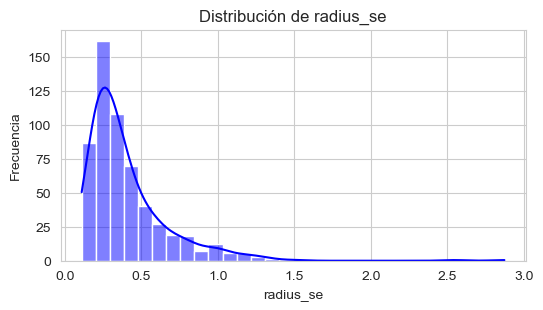

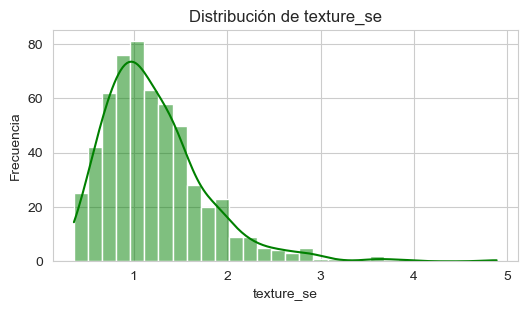

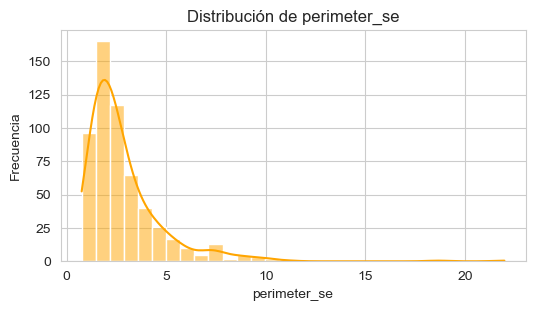

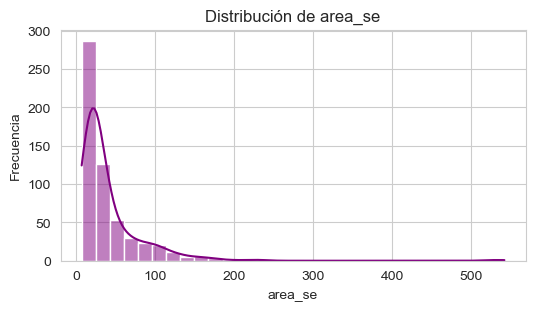

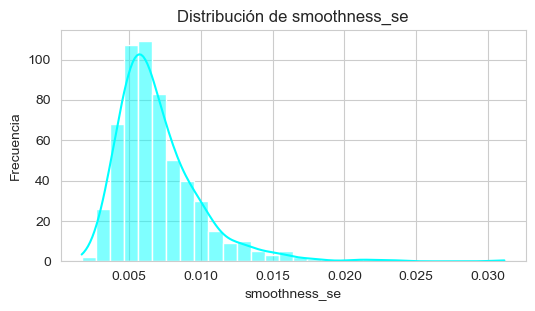

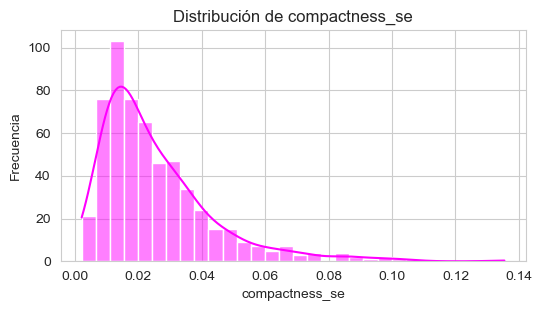

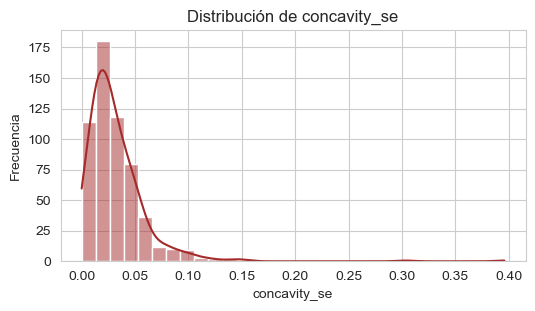

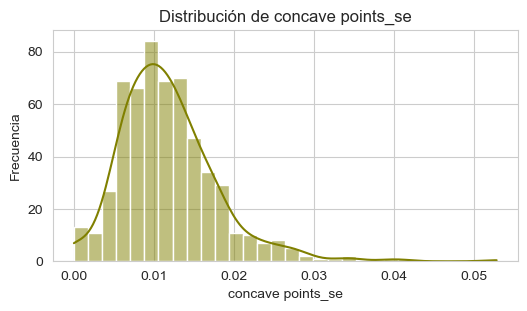

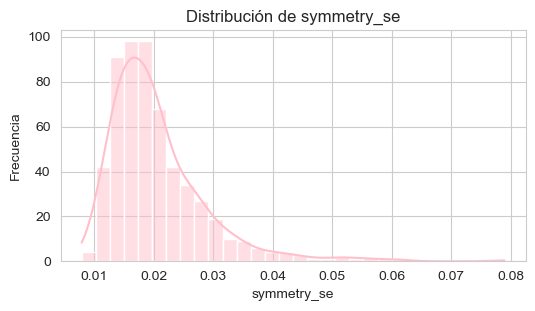

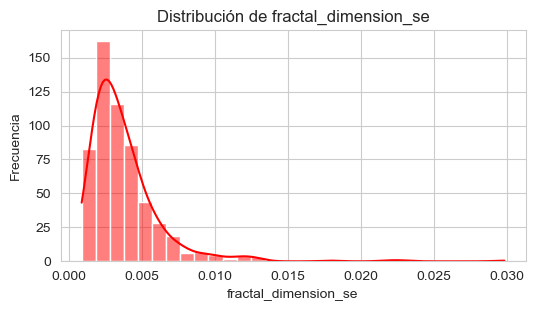

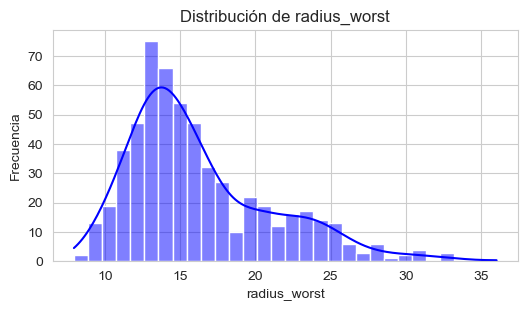

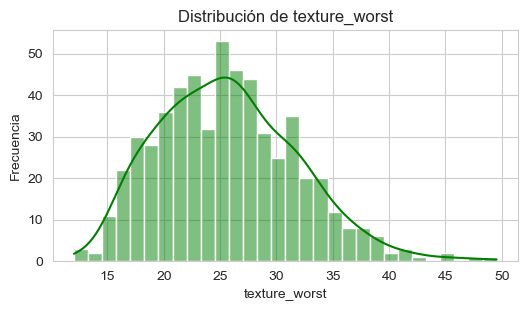

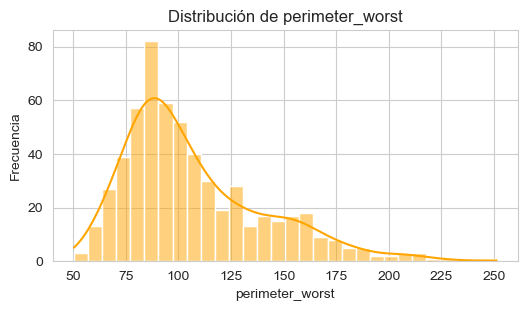

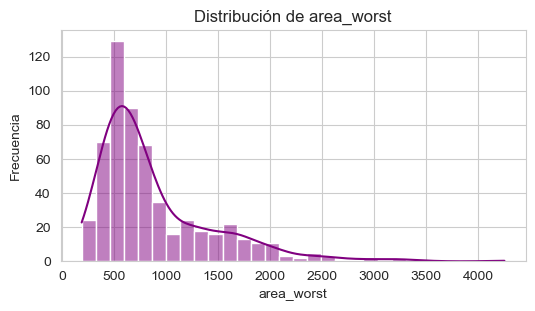

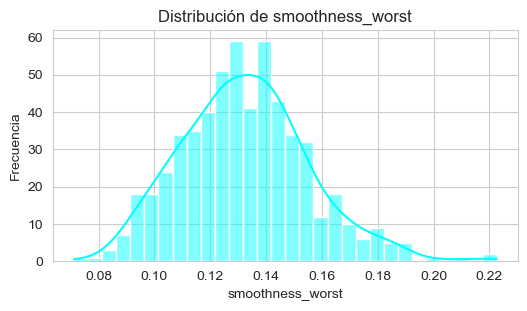

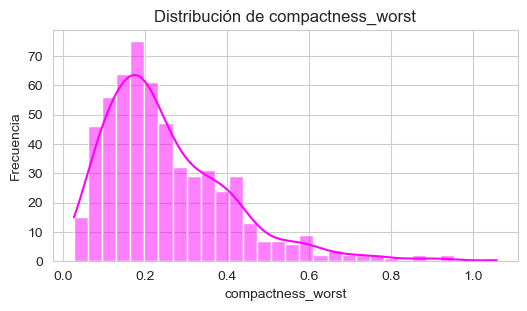

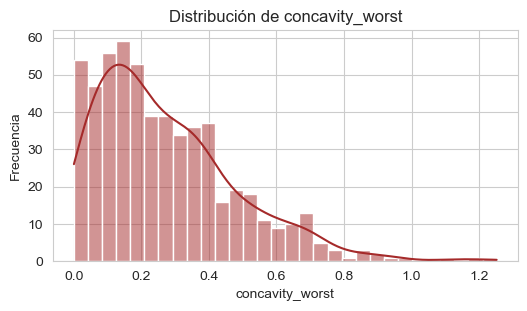

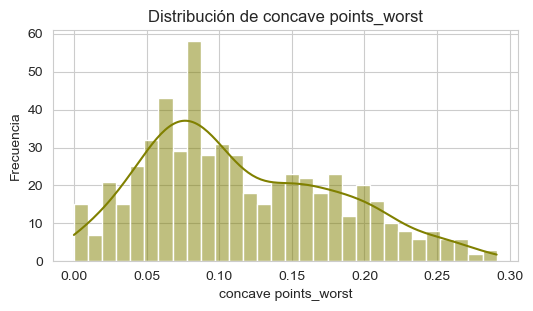

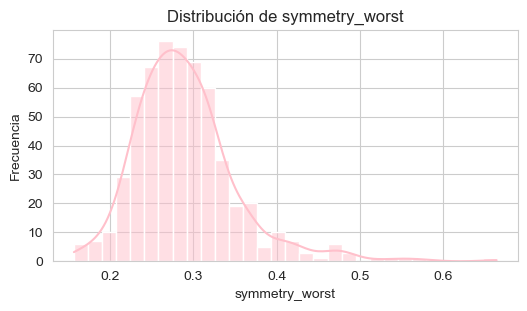

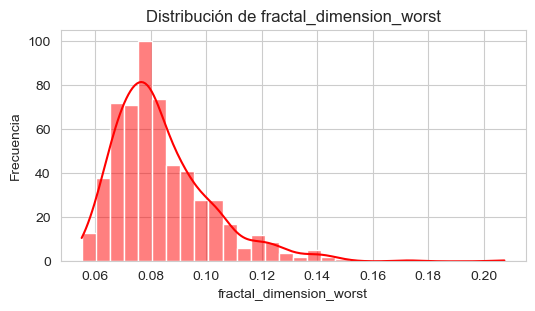

In [78]:
import seaborn as sns
lista_columnas = dataset.select_dtypes(include=['int64', 'float64']).columns
colores = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'brown', 'olive', 'pink']

for i, columna in enumerate(lista_columnas):
    plt.figure(figsize=(6, 3))
    color = colores[i % len(colores)]  # Para evitar errores si hay más columnas que colore
    sns.histplot(dataset[columna], kde=True, bins=30, color= color)
    plt.title(f'Distribución de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

<font size="4">

Después, procedemos a caclular la relación entre las variables, es decir, la correlación, a través de un mapa de calor que representará la matriz de correlación. Para ello, seguiemos el siguiente criterio mostrado en la siguiente tabla:

| Tipo de correlación                    | Modelos lineales                 | Árboles / Random Forest / XGBoost                   |
| -------------------------------------- | -------------------------------- | --------------------------------------------------- |
| Alta correlación entre predictores     | Eliminar, regularizar o usar PCA | No crítico, pero puede simplificar el modelo        |
| Baja correlación con variable objetivo | Eliminar                         | Analizar más a fondo, puede aportar valor no lineal |
| Moderada-alta correlación con objetivo | Mantener                         | Mantener                                            |

Acto seguido, procedemos a analizar la distribución de los datos de cada variable predictora con respecto a la variable objetivo.


                         diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000    -0.730029     -0.415185       -0.742636   
radius_mean              -0.730029     1.000000      0.323782        0.997855   
texture_mean             -0.415185     0.323782      1.000000        0.329533   
perimeter_mean           -0.742636     0.997855      0.329533        1.000000   
area_mean                -0.708984     0.987357      0.321086        0.986507   
smoothness_mean          -0.358560     0.170581     -0.023389        0.207278   
compactness_mean         -0.596534     0.506124      0.236702        0.556936   
concavity_mean           -0.696360     0.676764      0.302418        0.716136   
concave points_mean      -0.776614     0.822529      0.293464        0.850977   
symmetry_mean            -0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean    0.012838    -0.311631     -0.076437       -0.261477   
radius_se                -0.

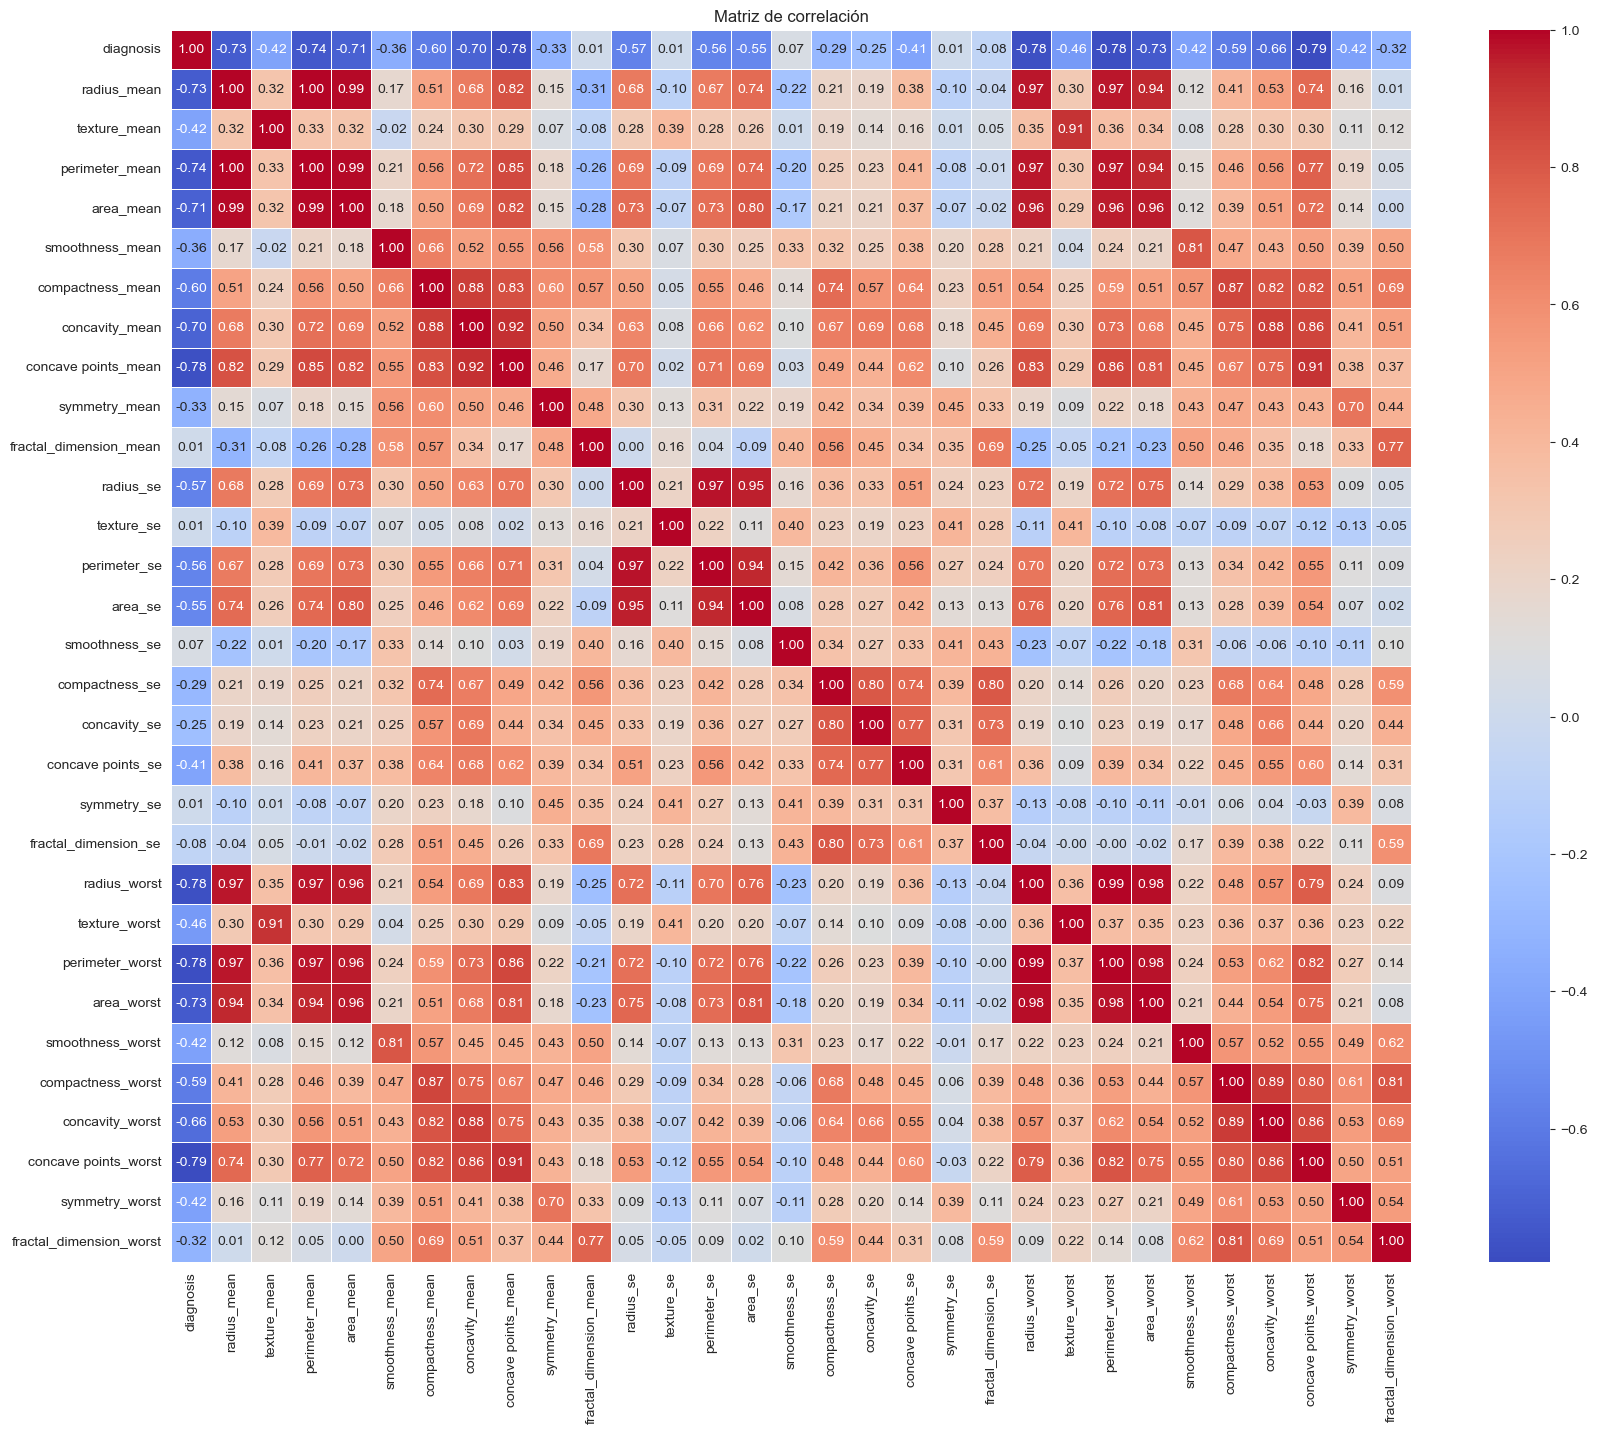

In [79]:
# calculamos la matriz de correlación
dataset_num = dataset.select_dtypes(include=['int64', 'float64'])
corr_matrix = dataset_num.corr()

print(corr_matrix)

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

<font size="4">

Acto seguido, procedemos a analizar la distribución de los datos de cada variable predictora con respecto a la variable objetivo.

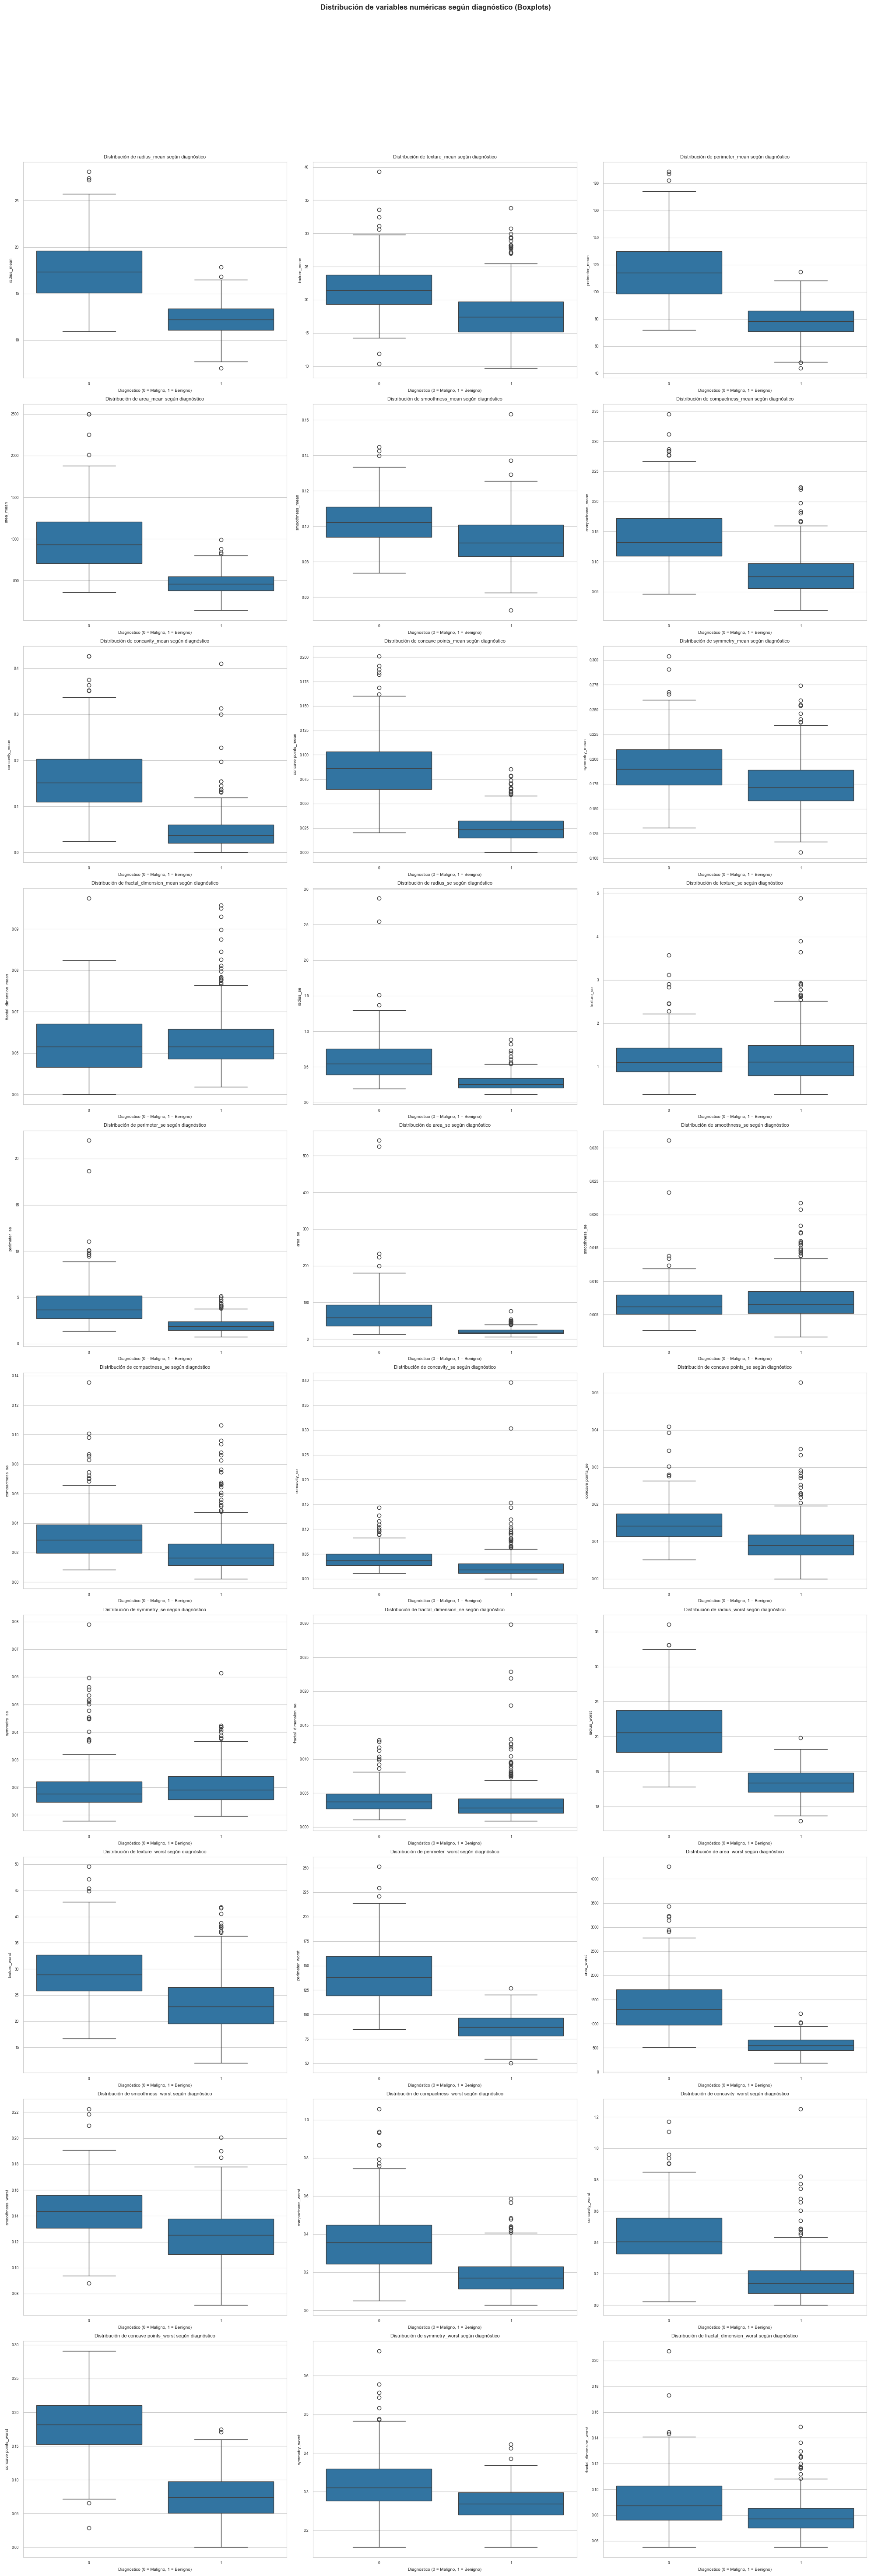

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selección de columnas numéricas
columnas_float = dataset.select_dtypes(include=['float64']).columns

# Configuración de subplots
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(20, 60))
axes = axes.flat

# Graficamos cada boxplot
for i, colum in enumerate(columnas_float[:len(axes)]):  # Evita index out of range
    sns.boxplot(
        x='diagnosis',
        y=colum,
        data=dataset,
        ax=axes[i]
    )
    axes[i].set_title(f'Distribución de {colum} según diagnóstico', fontsize=8)
    axes[i].set_xlabel('Diagnóstico (0 = Maligno, 1 = Benigno)', fontsize=7)
    axes[i].set_ylabel(colum, fontsize=7)
    axes[i].tick_params(labelsize=6)

# Eliminamos ejes vacíos si hay menos columnas que subplots
for i in range(len(columnas_float), len(axes)):
    fig.delaxes(axes[i])

fig.tight_layout()
plt.subplots_adjust(top=0.92)
fig.suptitle('Distribución de variables numéricas según diagnóstico (Boxplots)', fontsize=12, fontweight="bold")
plt.show()

<font size="4">

Como la matriz de correlación muestra que muchas variables están correlacionadas entre sí, es por ello, que solo nos vamos a quedar con un único tipo de dato, es decir, por cada variables tenemos la media, el error y su valor más alto, pues vamos a quedarnos sólamente con la media y vamos a realizar un modelo únicamente con la media de cada valor. De esta manera, vamos a reducir la dimensión del dataset, lo cual puede ser bueno para nuestro modelo.

In [81]:
columnas = ["diagnosis"]

for columna in dataset.columns:
    if  "mean" in columna:
        columnas.append(columna)
        
dataset_reducido = dataset[columnas]
dataset_reducido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    int64  
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 49.0 KB


                        diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                1.000000    -0.730029     -0.415185       -0.742636   
radius_mean             -0.730029     1.000000      0.323782        0.997855   
texture_mean            -0.415185     0.323782      1.000000        0.329533   
perimeter_mean          -0.742636     0.997855      0.329533        1.000000   
area_mean               -0.708984     0.987357      0.321086        0.986507   
smoothness_mean         -0.358560     0.170581     -0.023389        0.207278   
compactness_mean        -0.596534     0.506124      0.236702        0.556936   
concavity_mean          -0.696360     0.676764      0.302418        0.716136   
concave points_mean     -0.776614     0.822529      0.293464        0.850977   
symmetry_mean           -0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   0.012838    -0.311631     -0.076437       -0.261477   

                        area_mean  smoo

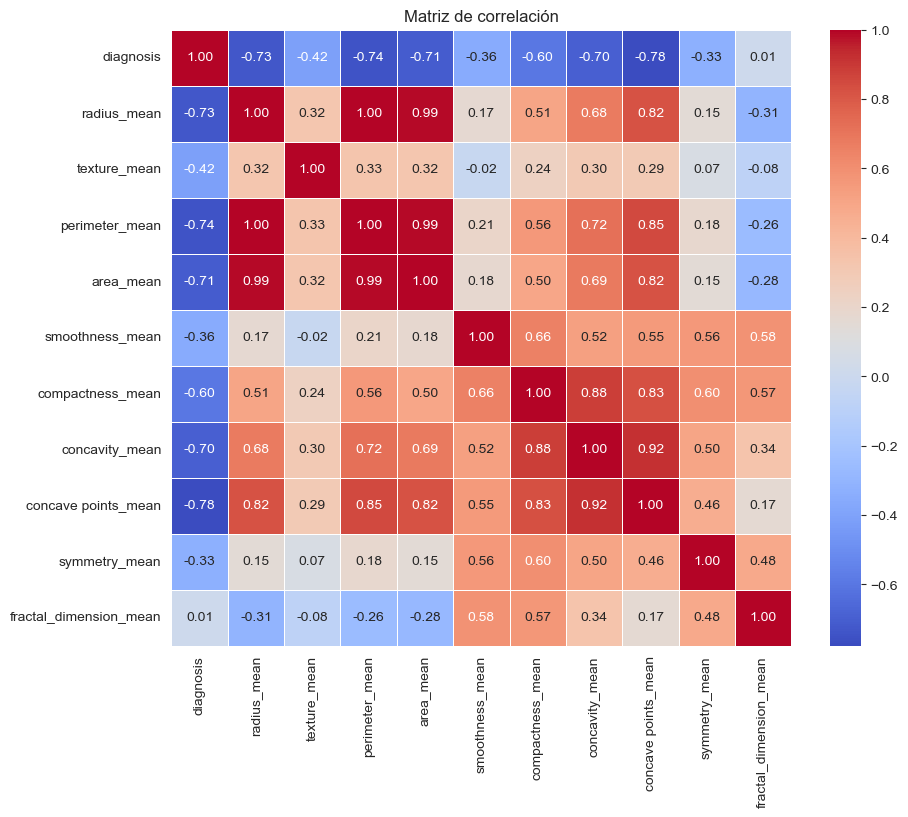

In [82]:
# calculamos la matriz de correlación
dataset_num = dataset_reducido.select_dtypes(include=['int64', 'float64'])
corr_matrix = dataset_num.corr()

print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

<font size="4">

Como seguimos teniendo variables muy correlacionadas, vamos a proceder a eliminar más variables. Para ello, vamos a quitar las que tengan una correlación alta entre ellas y, además, también eliminaremos aquellas variables que no tengan correlación con la solución.

In [83]:
dataset_reducido = dataset_reducido.drop(columns=["fractal_dimension_mean", "radius_mean", "perimeter_mean", "concave points_mean"])
dataset_reducido.head()

,diagnosis,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean
0,0,10.38,1001.0,0.11840,0.27760,0.3001,0.2419
1,0,17.77,1326.0,0.08474,0.07864,0.0869,0.1812
2,0,21.25,1203.0,0.10960,0.15990,0.1974,0.2069
3,0,20.38,386.1,0.14250,0.28390,0.2414,0.2597
4,0,14.34,1297.0,0.10030,0.13280,0.1980,0.1809


                  diagnosis  texture_mean  area_mean  smoothness_mean  \
diagnosis          1.000000     -0.415185  -0.708984        -0.358560   
texture_mean      -0.415185      1.000000   0.321086        -0.023389   
area_mean         -0.708984      0.321086   1.000000         0.177028   
smoothness_mean   -0.358560     -0.023389   0.177028         1.000000   
compactness_mean  -0.596534      0.236702   0.498502         0.659123   
concavity_mean    -0.696360      0.302418   0.685983         0.521984   
symmetry_mean     -0.330499      0.071401   0.151293         0.557775   

                  compactness_mean  concavity_mean  symmetry_mean  
diagnosis                -0.596534       -0.696360      -0.330499  
texture_mean              0.236702        0.302418       0.071401  
area_mean                 0.498502        0.685983       0.151293  
smoothness_mean           0.659123        0.521984       0.557775  
compactness_mean          1.000000        0.883121       0.602641  
concavi

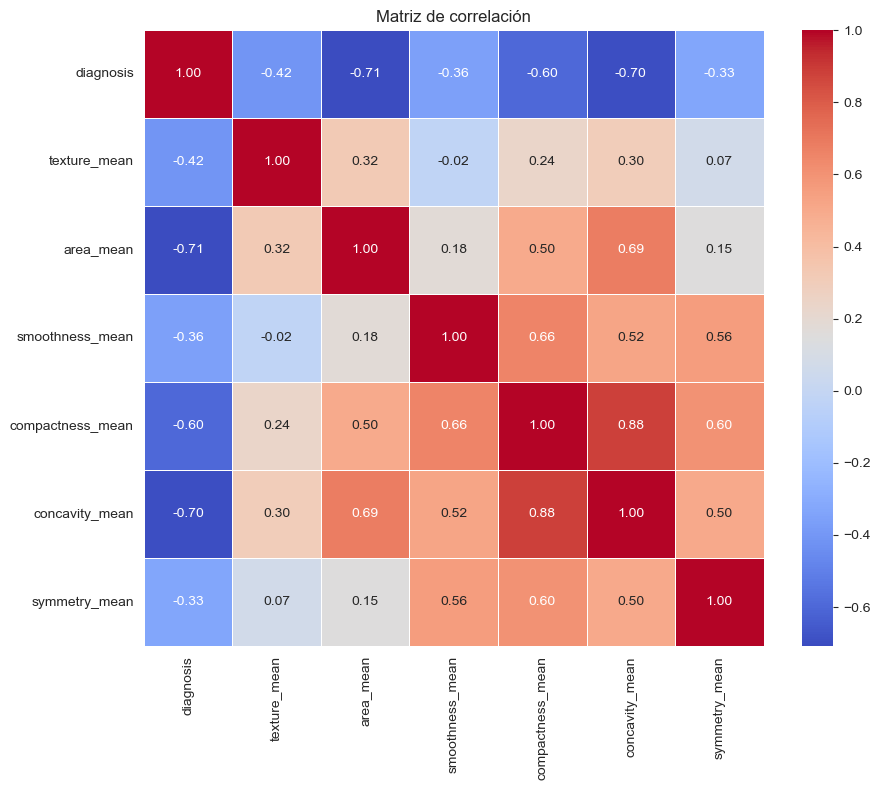

In [84]:
# calculamos la matriz de correlación
dataset_num = dataset_reducido.select_dtypes(include=['int64', 'float64'])
corr_matrix = dataset_num.corr()

print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

<font size="4">

# Preprocesamiento

Una vez ya hemos hecho el análisis exploratorio de los datos (EDA) procedemos a realizar el preprocesamiento, en donde, solo tenemos valores numéricos, por lo que vamos a aplicarles una normalización de manera que los datos estén con media 0 y desviación 1.

In [85]:
# dividimos dataset
x = dataset_reducido.drop(["diagnosis"], axis="columns")
y = dataset_reducido["diagnosis"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42, stratify=y)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((455, 6), (114, 6), (455,), (114,))

In [86]:
# aplicamos StandarScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

<font size="4">

# Definimos el modelo

Ya tenemos los datos preparados, ahora vamos a definir un modelo, para ello, vamos a crearnos varios modelos y cada uno usará un algoritmo diferente. De esta manera podremos coger el mejor después de ejecutarlos todos.

En primer lugar, vamos a utilizar un algoritmo de **regresión logística**, que es un modelo estadístico y de aprendizaje automático utilizado para resolver problemas de **clasificación binaria**, es decir, cuando la variable objetivo solo puede tomar dos valores (por ejemplo, "sí" o "no", "fraude" o "no fraude"). A diferencia de la regresión lineal, que predice valores continuos, la regresión logística calcula la **probabilidad** de que una observación pertenezca a una de las clases, utilizando la **función sigmoide** para transformar la salida en un valor entre 0 y 1. El modelo ajusta los coeficientes de las variables independientes (predictoras) para encontrar la mejor frontera de decisión que separe las clases, y es ampliamente utilizado por su **simplicidad, interpretabilidad** y buen rendimiento en tareas linealmente separables.


In [87]:
from sklearn.metrics import accuracy_score, classification_report

# Algoritmo regresion logistica
modelo_RL = LogisticRegression()

hiperparametro_RL = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# definimos el modelo
grid_RL = GridSearchCV(LogisticRegression(), hiperparametro_RL, cv=5)

# entrenamos el modelo
grid_RL.fit(x_train, y_train)

# cogemos la mejor combinacion
best_RL = grid_RL.best_estimator_
print(f"Mejor combinacion: {best_RL}")

# prediccion conjunto test
y_pred = best_RL.predict(x_test)

# calculamos metricas
matriz_RL = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(f"Matriz de confusion\n {confusion_matrix(y_test, y_pred)}")
print("\nReporte de Clasificación:\n")
print(classification_report(y_test, y_pred, target_names=['Maligno', 'Benigno']))

Mejor combinacion: LogisticRegression(C=10, penalty='l1', solver='liblinear')
Accuracy: 0.9035087719298246
Matriz de confusion
 [[40  2]
 [ 9 63]]

Reporte de Clasificación:

              precision    recall  f1-score   support

     Maligno       0.82      0.95      0.88        42
     Benigno       0.97      0.88      0.92        72

    accuracy                           0.90       114
   macro avg       0.89      0.91      0.90       114
weighted avg       0.91      0.90      0.90       114



<font size="4">

El algoritmo **K-Nearest Neighbors** clasifica una nueva observación según las clases de sus k vecinos más cercanos en el conjunto de entrenamiento, medidos normalmente con una métrica de distancia como la distancia euclidiana. Es un algoritmo no paramétrico y perezoso (lazy learning), lo que significa que no aprende un modelo durante el entrenamiento, sino que guarda todos los datos y toma decisiones solo en el momento de la predicción. Es muy intuitivo y eficaz en conjuntos de datos pequeños o con patrones bien definidos, pero puede volverse lento y menos preciso en datasets grandes o con muchas variables irrelevantes.

In [88]:
# Definimos el modelo
modelo_KNN = KNeighborsClassifier(n_neighbors=2)

# Entrenamos el modelo con los datos
modelo_KNN.fit(x_train, y_train)

# Predecimos el modelo con conjunto de test
y_pred = modelo_KNN.predict(x_test)

# calculamos las metricas
matriz_KNN = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(f"Matriz de confusion\n {matriz_KNN}")
print("\nReporte de Clasificación:\n")
print(classification_report(y_test, y_pred, target_names=['Maligno', 'Benigno']))

Accuracy: 0.8508771929824561
Matriz de confusion
 [[41  1]
 [16 56]]

Reporte de Clasificación:

              precision    recall  f1-score   support

     Maligno       0.72      0.98      0.83        42
     Benigno       0.98      0.78      0.87        72

    accuracy                           0.85       114
   macro avg       0.85      0.88      0.85       114
weighted avg       0.89      0.85      0.85       114



<font size="4">

Los **árboles de decisión** son modelos que dividen recursivamente el espacio de datos en regiones basadas en reglas simples (por ejemplo, “¿la edad es mayor a 30?”), con el objetivo de separar las clases de la mejor forma posible. Cada nodo interno representa una condición sobre una variable, y cada rama conduce a una nueva división, hasta llegar a una hoja que asigna una clase. Son fáciles de interpretar, no requieren preprocesamiento (como escalado de variables), y manejan bien tanto datos numéricos como categóricos. Sin embargo, tienden a sobreajustarse si no se podan o se limita su profundidad.

In [90]:
# definimos el modelo
modelo_DT = DecisionTreeClassifier()

# hiperparametros
param_grid = {
    'max_depth': [3, 5, 10, 20, None],               # Profundidad del árbol
    'min_samples_split': [2, 5, 10],                  # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 5, 10],                # Mínimo de muestras en una hoja
    'criterion': ['gini', 'entropy'],                 # Función para medir calidad de división
    'max_features': [None, 'sqrt', 'log2']            # Número de características consideradas en cada división
}

# definimos el gridsearchCV
grid_DT = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# entrenamos el modelo
grid_DT.fit(x_train, y_train)

print(f"Accuracy:", grid_DT.score(x_test, y_test))
print(f"Best parameters: {grid_DT.best_params_}")

# Hacemos la prediccion del modelo
y_pred = grid_DT.best_estimator_.predict(x_test)

# calculamos las metricas
matriz_DT = confusion_matrix(y_test, y_pred)
print("Accuracy:", grid_DT.score(x_test, y_test))
print(f"Matriz de confusion\n {matriz_DT}")
print(f"Reporte de clasificación:\n{classification_report(y_test, y_pred, target_names=['Maligno', 'Benigno'])}")

Accuracy: 0.9210526315789473
Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy: 0.9210526315789473
Matriz de confusion
 [[39  3]
 [ 6 66]]
Reporte de clasificación:
              precision    recall  f1-score   support

     Maligno       0.87      0.93      0.90        42
     Benigno       0.96      0.92      0.94        72

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



<font size="4">

Como podemos observar, estos tres algoritmos empleados muestran mejores resultados que la propuesta realizada en la clase.